Handling and Removing outliers
Definition:
• Outliers: Outliers are data points that differ significantly from other observations. They can occur due to variability in the data or experimental errors.
• Handling Outliers: This involves identifying and deciding whether to remove or adjust outliers to improve the accuracy of statistical analyses and machine learning models,
Use Case in Real Life:
• Financial Data Analysis: Identify and remove outliers in financial transaction data to prevent fraudulent activities and improve the accuracy of financial models.
• Customer Data Management: Clean customer data by handling outliers in age, income, and spending to create accurate customer segments and improve marketing strategies.
• Health Data Analysis: Detect and handle outliers in patient health records, such as blood pressure and cholesterol levels, to ensure accurate diagnoses and treatment plans.

In [2]:
import pandas as pd
# Loading the dataset
df=pd.read_csv("C:\Personal Coding\Python, Data Science & Machine Learning Integrated by CipherSchools\Lecture 27\outliers_data.csv")
print(df)

      Name  Age   Salary   Department
0    Alice   25    50000           HR
1      Bob   30  1200000  Engineering
2  Charlie   35    70000  Engineering
3    David   50    60000           HR
4      Eve   28    80000           HR
5    Frank   40    55000        Sales
6    Grace   50    85000        Sales
7     Hank   60    90000        Sales
8      Ivy   32  1500000  Engineering
9     Jack   45    62000  Engineering


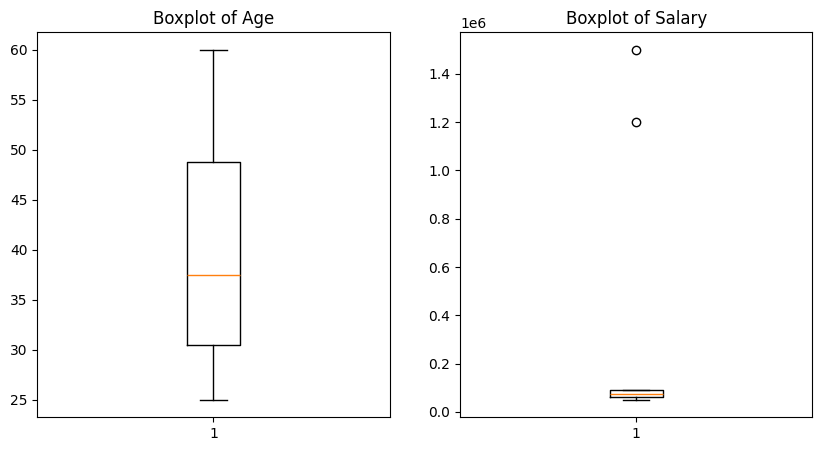

In [3]:
import matplotlib.pyplot as plt
# Boxplot to visualize outliers in the Age column
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.boxplot(df['Age'].dropna())
plt.title('Boxplot of Age')

# Boxplot to visualize outliers in the Salary column
plt.subplot(1,2,2)
plt.boxplot(df['Salary'].dropna())
plt.title('Boxplot of Salary')

plt.show()

In [4]:
# Handling Outliers - Capping Outliers
# Capping the outliers using IQR method
df_capped=df.copy()
for col in ['Age','Salary']:
    Q1=df_capped[col].quantile(0.25)
    Q3=df_capped[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    df_capped[col]=df_capped[col].apply(lambda x:upper_bound if x>upper_bound else (lower_bound if x<lower_bound else x))
    print('Data after capping the outliers using IQR method: ')
    print(df_capped)

Data after capping the outliers using IQR method: 
      Name  Age   Salary   Department
0    Alice   25    50000           HR
1      Bob   30  1200000  Engineering
2  Charlie   35    70000  Engineering
3    David   50    60000           HR
4      Eve   28    80000           HR
5    Frank   40    55000        Sales
6    Grace   50    85000        Sales
7     Hank   60    90000        Sales
8      Ivy   32  1500000  Engineering
9     Jack   45    62000  Engineering
Data after capping the outliers using IQR method: 
      Name  Age    Salary   Department
0    Alice   25   50000.0           HR
1      Bob   30  131125.0  Engineering
2  Charlie   35   70000.0  Engineering
3    David   50   60000.0           HR
4      Eve   28   80000.0           HR
5    Frank   40   55000.0        Sales
6    Grace   50   85000.0        Sales
7     Hank   60   90000.0        Sales
8      Ivy   32  131125.0  Engineering
9     Jack   45   62000.0  Engineering


In [6]:
# Replacing the outliers with median values
df_replaced=df.copy()
for col in ['Age','Salary']:
    Q1=df_replaced[col].quantile(0.25)
    Q3=df_replaced[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q1+1.5*IQR
    median=df_replaced[col].median()
    df_replaced[col]=df_replaced[col].apply(lambda x: median if x>upper_bound or x<lower_bound else x)
    print('Data after replacing outliers with median values: ')
    print(df_replaced)

Data after replacing outliers with median values: 
      Name   Age   Salary   Department
0    Alice  25.0    50000           HR
1      Bob  30.0  1200000  Engineering
2  Charlie  35.0    70000  Engineering
3    David  50.0    60000           HR
4      Eve  28.0    80000           HR
5    Frank  40.0    55000        Sales
6    Grace  50.0    85000        Sales
7     Hank  37.5    90000        Sales
8      Ivy  32.0  1500000  Engineering
9     Jack  45.0    62000  Engineering
Data after replacing outliers with median values: 
      Name   Age   Salary   Department
0    Alice  25.0  50000.0           HR
1      Bob  30.0  75000.0  Engineering
2  Charlie  35.0  70000.0  Engineering
3    David  50.0  60000.0           HR
4      Eve  28.0  80000.0           HR
5    Frank  40.0  55000.0        Sales
6    Grace  50.0  85000.0        Sales
7     Hank  37.5  90000.0        Sales
8      Ivy  32.0  75000.0  Engineering
9     Jack  45.0  62000.0  Engineering
